In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
waze_raw = pd.read_csv('../data/waze_dataset.csv')

In [38]:
waze_raw.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [39]:
#Null counts and column datatypes
waze_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


Column description/clarification. Upon reading the column descriptions and viewing the datatypes, it becomes clear that most columns covers the time period of one month. There is no information available on which month or year the data was collected. 

"Sessions", a column of integers, represents the number of occurences of a user opening the app during the month. "Total_sessions", a column of floats, is actually a model estimate of the total number of sessions since a user has onboarded. As we have no information about or way to reproduce these modeled results, the current plan is to discard or set aside this column.

Other columns, such as "n_days_after_onboarding" and "total_navigations_fav1" do represent information on the the entire span of membership. Not sure why a model estimate was used to calculate total sessions.

In [40]:
 #Calculate summary statistics for each column
waze_raw.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


Preliminary insights from summary statistics: 

'ID', with min 0, median 7499 and max 14998, appears to be a simple list beginning with 0 and proceeding to 14998. This can become the index for the cleaned dataset. 

'sessions' has an expected min of 0, as many people have apps that they never open. The max, 743 opens in a one-month period is interesting, averaging nearly 25 opens per day. This may indicate highly engaged users, or may be an outlier. The 'sessions' column is a good candidate for distribution analysis.  

'drives', representing the occurences of drives >= 1 km has a similar summary distribution and may be an important column in predicting churn. Another candidate for more in-depth distribution analysis. 

Two columns, total_navigations_fave(1 and 2), represent "Total navigations since onboarding to the user’s favorite place[s]". These columns are appealing as they represent data occuring over the span of user engagement, but the definition of "favorite place" is unknown. They may be useful in modelling, but I'm not going to investigate them further at this time. No nulls. 


The 'n_days_after_onboarding' is particularly vauable as it represents the only information about the user's history beyond their visits to favorite places and the comprehensive 'total_session' column which has been set aside due to its modeled origin. The newest user tenure (min) is only 4 days while the longest (max) is around 9.5 years. As Waze was released in 2006, and the 25% and 50% rows show a gradual increase, this doesn't raise red flags, though considering the importance of the column, a distribution analysis is recommended.   

'driven_km_drives' represents total kilometers driven during the month. 

The final two columns, 'activity_days' and 'driving_days' have no further description provided. At this point, it seems likely that 'activity_days' corresponds with 'sessions' column and 'driving_days' corresponds with the 'drives' column. Inspection of sample rows may clarify. 

'activity_days' has a max of 31, which indicates that the chosen month has 31 days. However, the 'driving_days' max is only 30. It seems odd that out of a sample of 14,999 drivers, not one drove every single day. It is possible though. Visualizing the distribution may bring any potential issues to light. 


In [41]:
#Counts and percents unique values 
unique_val_count = waze_raw.nunique()
unique_val_percentage = round(waze_raw.nunique()/14999*100)
print(unique_val_count)

ID                         14999
label                          2
sessions                     469
drives                       401
total_sessions             14999
n_days_after_onboarding     3441
total_navigations_fav1       730
total_navigations_fav2       287
driven_km_drives           14999
duration_minutes_drives    14999
activity_days                 32
driving_days                  31
device                         2
dtype: int64


In [58]:
#check for duplicates. 

waze_raw['driven_km_drives'].value_counts().sort_values(ascending = False).head()

2628.845068    1
2512.308716    1
2723.495224    1
925.030474     1
3059.148818    1
Name: driven_km_drives, dtype: int64

Because 'driven_km_drives' is a float value with six digits after the decimal, 
a sorted value count of this column with no counts above one assures that there are no duplicate rows. 


Check the 'label' column to see if values other than "retain" and "churn" exist. 
We can see in the unique count df that 'label' has only two values. This may be turned into a boolean type.

The 'ID' column can be made index.

The dataset has nulls (700) in the 'label' column only. The 'label' column indicates whether a user churned or retained. As we are focusing on user churn as the column we want to predict, these rows are not useful to this analysis. All 700 rows with missing values in the 'label' column will need to be discarded. The remaining rows (14299) will still be sufficient to create and test our model.  

Column datatypes seem reasonable. The 'label' column, the focus of our prediction, is an object, but could probably be a boolean. 

In [45]:
#Make 'ID' column the index

df_indexed = waze_raw.set_index('ID')


In [51]:
#Inspect and remove rows with missing values in the 'label' column

#convert label column datatype to boolean

df_indexed_bool = df_indexed['label'].apply(lambda x: True if x == 'churned' else False)

#rerun .info() to check that rows with null values removed
df_indexed_bool.head()


ID
0    False
1    False
2    False
3    False
4    False
Name: label, dtype: bool

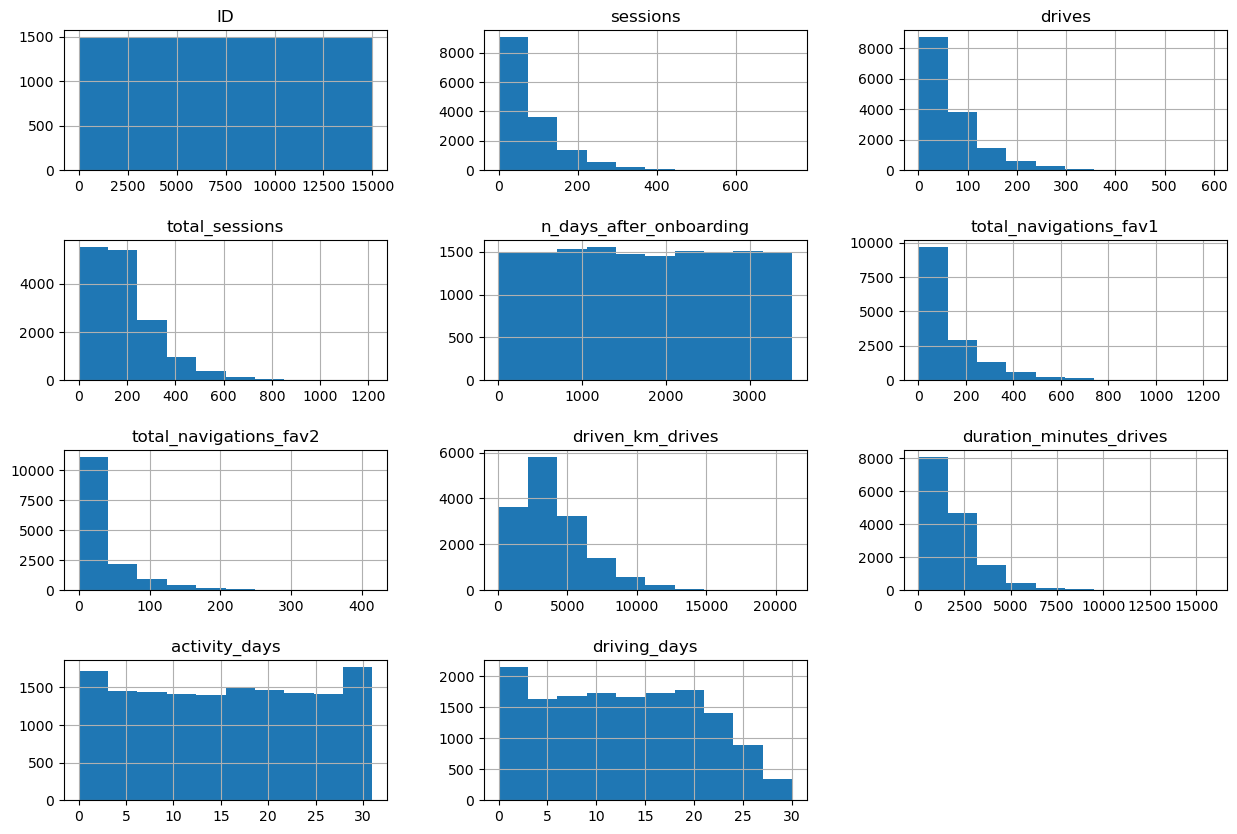

In [53]:
waze_raw.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

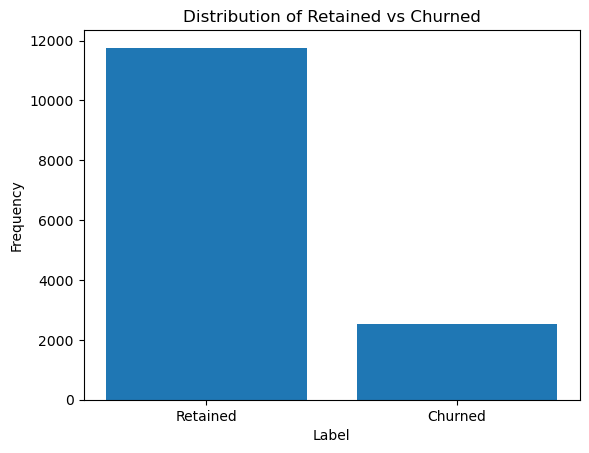

In [56]:

# Count the number of True (Retained) and False (Churned)
counts = waze_raw['label'].value_counts()

# Create a bar chart
plt.bar(['Retained', 'Churned'], counts)

plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of Retained vs Churned')

plt.show()




